In [1]:
"""
Created on Wed Apr 22 15:15:16 2015

Quiz 2 code.
"""

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# from compute_sta import compute_sta


FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']

sample_rate = 500 # Hz
time_step = 1/sample_rate

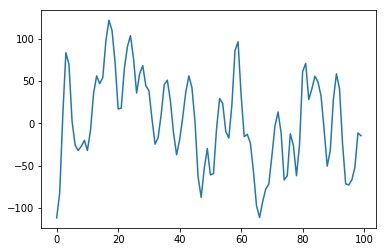

In [27]:
plt.plot(stim[0:100])

In [3]:
def compute_sta(stim,rho,num_timesteps):
    spikes = rho[stim_len:].nonzero()[0] + stim_len
    stims = np.zeros((len(spikes),stim_len))
    print("Data set contains %d spikes" % len(spikes))
    for i,rho_ind in enumerate(spikes):
        stims[i] = stim[(rho_ind - stim_len):rho_ind]

    return np.mean(stims,axis=0), stims

In [4]:
stim_duration = 300 # ms
stim_len = int(stim_duration * sample_rate / 1000)

avg_stim, stims = compute_sta(stim,rho,stim_len)
t = np.arange(-stim_len,0)*time_step



Data set contains 53583 spikes


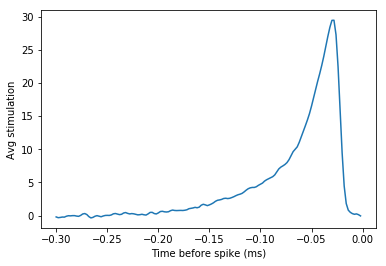

In [5]:
plt.plot(t,avg_stim)
plt.xlabel('Time before spike (ms)')
plt.ylabel('Avg stimulation');

In [23]:
u,s,v =np.linalg.svd(stims.T - np.expand_dims(avg_stim,stims.shape[0]),full_matrices=False)

//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


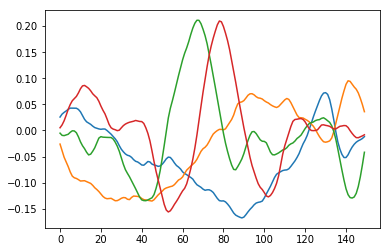

In [24]:
plt.plot(u[:,:4]);

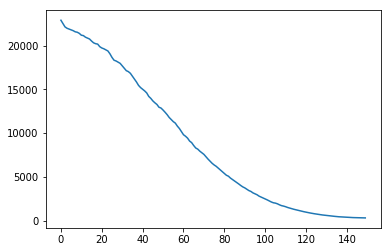

In [25]:
plt.plot(s)